In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("food_claims_2212.csv")

In [3]:
df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [5]:
df1=df['claim_amount']
df1.replace('R$', '',regex=True)
df1

0       R$ 74474.55
1       R$ 52137.83
2        R$ 24447.2
3       R$ 29006.28
4        R$ 19520.6
           ...     
1995     R$ 28982.3
1996     R$ 5188.44
1997    R$ 11975.85
1998    R$ 23516.28
1999      R$ 8051.4
Name: claim_amount, Length: 2000, dtype: object

In [6]:
df['claim_amount'] =df['claim_amount'].apply(lambda x:x.replace('R$ ','').replace(',',''))
df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,23516.28,23310.24,RECIFE,9,False,meat


In [7]:
df.nunique()

claim_id                2000
time_to_close            256
claim_amount            2000
amount_paid             1963
location                   4
individuals_on_claim      15
linked_cases               2
cause                      5
dtype: int64

In [8]:
df['location'].unique()

array(['RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL'], dtype=object)

In [9]:
df['linked_cases'].unique()

array([False, True, nan], dtype=object)

In [10]:
df['cause'].unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

In [11]:
df.columns[df.isna().any()].tolist()

['amount_paid', 'linked_cases']

In [12]:
# applying the method
count_nan = df['amount_paid'].isnull().sum()
 
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 36


In [13]:
df['amount_paid'].fillna(df['amount_paid'].median(), inplace = True)
# applying the method
count_nan = df['amount_paid'].isnull().sum()
 
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 0


In [14]:
df.columns[df.isna().any()].tolist()

['linked_cases']

In [15]:
df['linked_cases'].fillna("FALSE", inplace = True)
df.columns[df.isna().any()].tolist()

[]

In [16]:
df['cause'] = df['cause'].replace([' Meat'], 'meat')
df['cause'] = df['cause'].replace(['VEGETABLES'], 'vegetable')
df['cause'].str.lower()
df['cause'].unique()

array(['unknown', 'meat', 'vegetable'], dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [18]:
df.claim_amount = df.claim_amount.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 125.1+ KB


In [19]:
df.isna().sum()

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

#### The origin data has 2000 rows and 8 columns, in which:

There are 36 missing values in "amount_paid", and 26 missing values in "linked_cases".
Replace the missing values in "amount_paid" by its median.
Replace the missing values in "linked_cases" to "FALSE". There are 2 unique values as expected.
Convert all typo " Meat" to "meat" and "VEGETABLES" to "vegetable" in "cause" column. So there are only 3 unique values in "cause", which are "unknown", "meat", and "vegetable" as expected.
Convert type of "claim_amount" to float for processing after removing "R$ ".
There are 4 unique values in "location" as expected.
There are 15 unique values in "individuals_on_claim" as expected.
There are 2000 unique values in "claim_id" as expected as they are all unique.

In [20]:
# Question 2 : How does the number of claim differ across location?
print("Total Number of Individual on Claim Differ Across Location:")
print(df.groupby('location')['individuals_on_claim'].sum())

Total Number of Individual on Claim Differ Across Location:
location
FORTALEZA    2508
NATAL        2329
RECIFE       7101
SAO LUIS     4161
Name: individuals_on_claim, dtype: int64


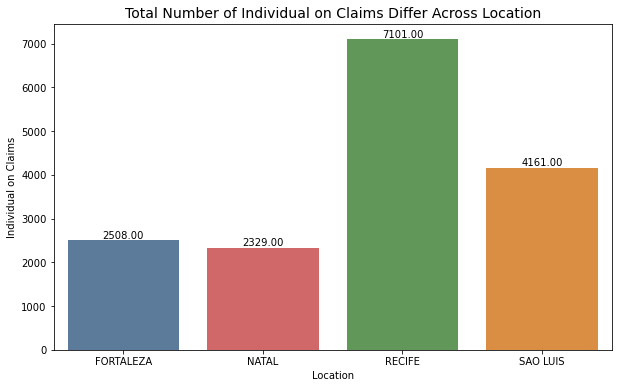

In [21]:
# Plot the number of claim differ across location
plt.figure(figsize=(10,6))
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
ax = sns.barplot(x = sorted(df["location"].unique()),
                 y = df.groupby(['location'])['individuals_on_claim'].sum(), palette=color)
plt.xlabel("Location")
plt.ylabel("Individual on Claims")
plt.title('Total Number of Individual on Claims Differ Across Location', fontsize = 14)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

### Which category of the variable location has the most observations?

Four location that the teams proccess with claims are: Recife, Fortaleza, Sao Luis, and Natal. The most claims found in Recife which has 7101 claims.

Explain whether the observations are balanced across categories of the variable location?

The 2nd highest number of claims is in Sao Luis, the 3rd is in Fortaleza, and the least is in Natal. This would suggest that the team should focus on distributing their members to handle claims in place with most claims. Then Vivendo fast food company should consider why that there are lots of claims in Recife.

In [22]:
# Question 3 : How does the average time to close claims differ by location?
print("Average time to close claims differ by location: ")
print(df.groupby('location')['time_to_close'].mean())

Average time to close claims differ by location: 
location
FORTALEZA    185.305466
NATAL        185.926829
RECIFE       184.607910
SAO LUIS     187.170213
Name: time_to_close, dtype: float64


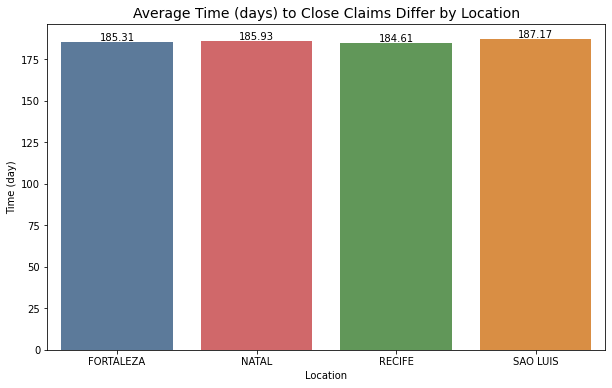

In [23]:
# Plot the the average time to close claims differ by location
plt.figure(figsize=(10,6))
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
bx = sns.barplot(x = sorted(df["location"].unique()),
                 y = df.groupby('location')['time_to_close'].mean(),palette=color)
plt.xlabel("Location")
plt.ylabel("Time (day)")
plt.title('Average Time (days) to Close Claims Differ by Location', fontsize = 14)
for p in bx.patches:
  bx.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

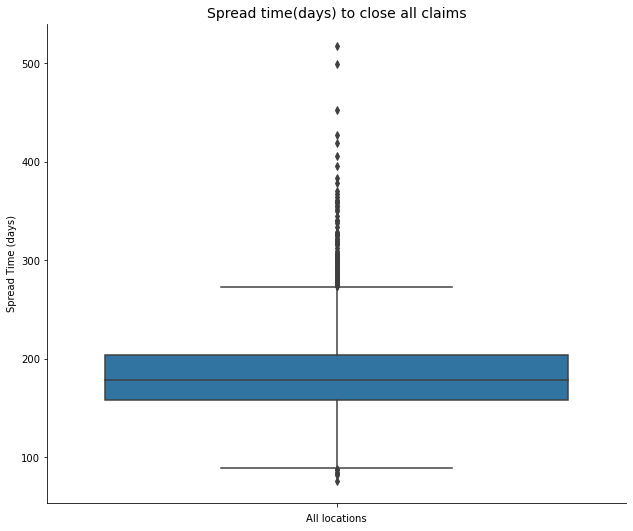

In [24]:
# Plot the time to close claims differ by location
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
cx = sns.catplot( y='time_to_close', kind="box", data = df, height=7, aspect=8.7/7)
plt.xlabel("All locations")
plt.ylabel("Spread Time (days)")
plt.title('Spread time(days) to close all claims', fontsize = 14)
plt.show()

In [25]:
df['time_to_close'].mean()

185.568

In [26]:
df['time_to_close'].median()

179.0

In [27]:
df.time_to_close.quantile(0.25)

158.0

In [28]:
df.time_to_close.quantile(0.75)

204.0

In [29]:
df1 = df[df["time_to_close"]<365]
df1

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,28982.30,24265.02,RECIFE,10,False,meat
1996,1997,166,5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,23516.28,23310.24,RECIFE,9,False,meat


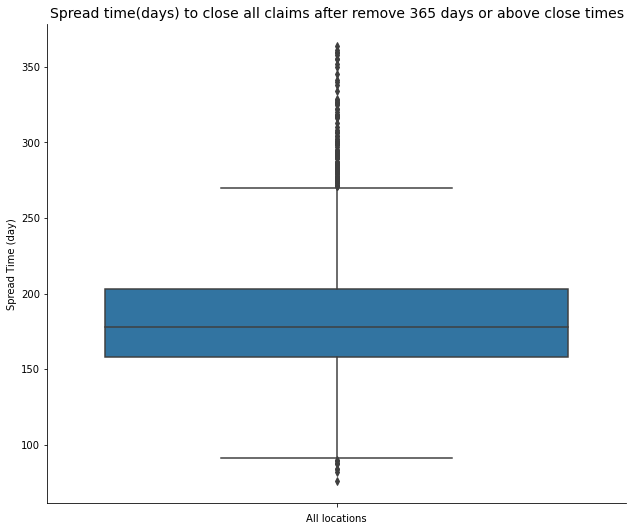

In [30]:
# Plot the time to close claims differ by location in subframe
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
cx = sns.catplot( y=df1['time_to_close'], kind="box", data = df, height=7, aspect=8.7/7)
plt.xlabel("All locations")
plt.ylabel("Spread Time (day)")
plt.title('Spread time(days) to close all claims after remove 365 days or above close times', fontsize = 14)
plt.show()

In [31]:
df1['time_to_close'].median()

178.0

In [32]:
df1.time_to_close.quantile(0.25)

158.0

In [33]:
df1.time_to_close.quantile(0.75)

203.0

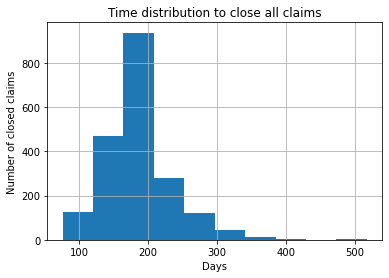

In [34]:
df.hist(column='time_to_close')
plt.xlabel("Days")
plt.ylabel("Number of closed claims")
plt.title('Time distribution to close all claims')
plt.show()

#### Describe the distribution of time to close for all claims?

The average number of days to close the claim is 185.568 days, and the median of days for closing the a claim is 179 days. In most of the cases, it is required from 158 days to 204 days to close the claims.

There are 11 cases which have closing day higher than 365. The legal teams should focus on why does it happen. However, those results seem to provide proper numbers of days that needed for close in all locations which are around 158 days to 204 days.

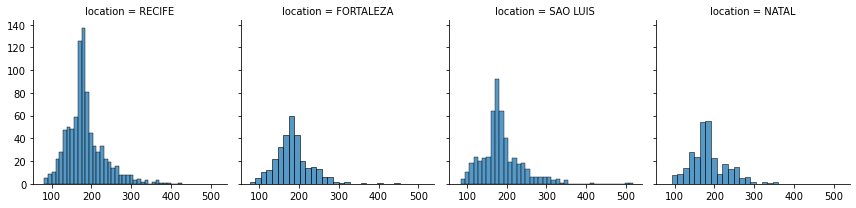

In [35]:
g = sns.FacetGrid(df, col="location")
g.map_dataframe(sns.histplot, x="time_to_close")

For each location, the distribution is slightly different but the most required days to close the claims are not much different.

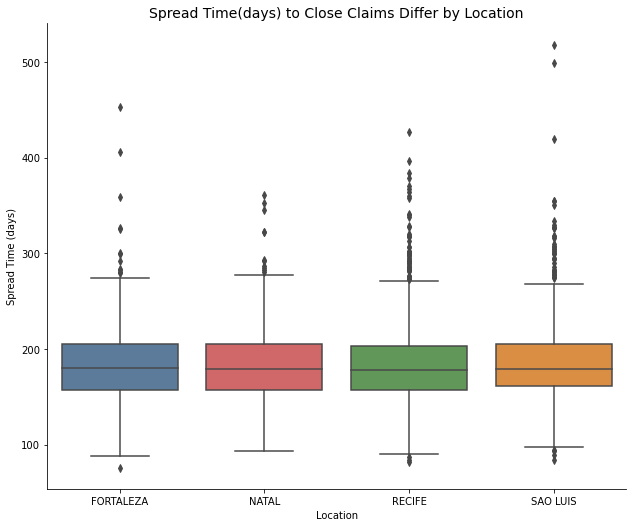

In [36]:
# Plot the time to close claims differ by location
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
cx = sns.catplot(x="location", y='time_to_close', kind="box", data = df, order = sorted(df["location"].unique()), palette=color, height=7, aspect=8.7/7)
plt.xlabel("Location")
plt.ylabel("Spread Time (days)")
plt.title('Spread Time(days) to Close Claims Differ by Location', fontsize = 14)
plt.show()

In [37]:
print(df.groupby('location')['time_to_close'].mean())

location
FORTALEZA    185.305466
NATAL        185.926829
RECIFE       184.607910
SAO LUIS     187.170213
Name: time_to_close, dtype: float64


In [38]:
print(df.groupby('location')['time_to_close'].median())

location
FORTALEZA    180
NATAL        179
RECIFE       178
SAO LUIS     179
Name: time_to_close, dtype: int64


### Describe the relationship between time to close and location

From the plot, both mean and median days to close the claims are quite the same for each locations. Hence, there is no suspicious for any location to have abnormal days to handle the claims.

However, Sao Luis have more outliers in both sides, which may need more caution from legal team. There either issues with complicated causes or with the Sao Luis claim management. In contract, Natal has the least outliers in both sides, which can be the case study to have closer look on Sao Luis.

